Import Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

Read the Dataset from the Web

In [4]:
# Correct raw URL to read directly from the internet
url = 'https://stats.idre.ucla.edu/stat/stata/dae/binary.dta'
df = pd.read_stata(url)

# Check the shape and a preview of the dataset
print(df.shape)
print(df.head())


(400, 4)
   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0


Check for Missing Values

In [5]:
print(df.isnull().sum())


admit    0
gre      0
gpa      0
rank     0
dtype: int64


Define Feature Columns and Target

In [6]:
# Independent variables (features)
feature_cols = ['gre', 'gpa', 'rank']

# Target variable
X = df[feature_cols]
y = df['admit']


 Split the Dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(320, 3) (320,) (80, 3) (80,)


Fit Logistic Regression Model

In [8]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Evaluate the Model

In [9]:
# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# Accuracy Score
acc_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_score)
print("Accuracy Percentage:", int(acc_score * 100), "%")


Confusion Matrix:
 [[50  4]
 [23  3]]
Accuracy Score: 0.6625
Accuracy Percentage: 66 %


Plot Heatmap of Confusion Matrix

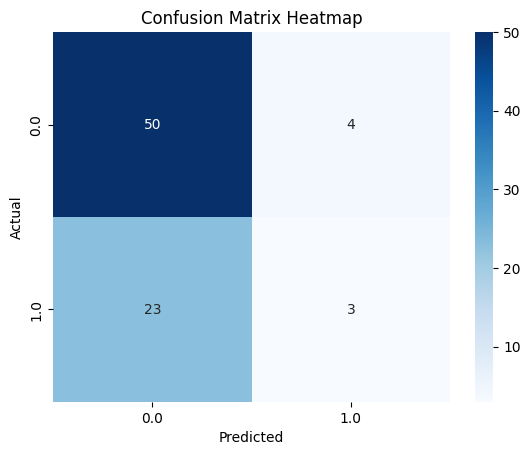

In [10]:
conf_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_df, annot=True, cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.show()
